# Fashion MNIST

## Imports

In [1]:
# General imports
import numpy as np ; np.random.seed(1) # for reproducibility
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

# TensorFlow
import tensorflow as tf
from tensorflow import keras

## TensorFlow information

In [2]:
# Indicate the version of Tensorflow and whether it uses the CPU or the GPU
print("TensorFlow version:", tf.__version__)

if len(tf.config.list_physical_devices('GPU')) > 0:
    print("The GPU will be used for calculations.")
    
else:
    print("The CPU will be used for calculations.")

TensorFlow version: 2.4.0
The CPU will be used for calculations.


## Import data (Fashion MNIST)

In [3]:
# Import dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Describe the data

In [4]:
# Describe training data
length_training = len(training_images)
print('Number of training images:', length_training)

# Describe test data
length_test = len(test_images)
print('Number of test images:', length_test)

Number of training images: 60000
Number of test images: 10000


In [5]:
# Take dimensions of the training images
width_train = training_images.shape[1]
height_train = training_images.shape[2]

# Take dimensions of the test images
width_test = test_images.shape[1]
height_test = test_images.shape[2]

# Assert that the dimensions match between both datasets
assert width_train == width_test , "Dimensions don't match between the training and the test set"
assert height_train == height_test , "Dimensions don't match between the training and the test set"

# Print dimensions
print('Dimensions of the images: (' + str(width_train) + ',' + str(height_train) + ')')

Dimensions of the images: (28,28)


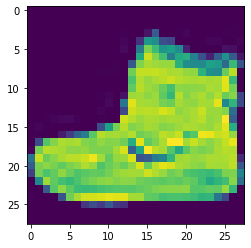

In [6]:
# Set print options
np.set_printoptions(linewidth=200)

# Plot some images in the training set
plt.imshow(training_images[0]);

## Normalize the data

In [7]:
# Normalize
training_images  = training_images / 255.0
test_images = test_images / 255.0

## Models

### Sequential Neural Network

In [8]:
# Set seed for random functions
tf.random.set_seed(1)

# Build sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(width_train, height_train)), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile model
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Fit model
model.fit(
    training_images, 
    training_labels, 
    epochs=10, 
    verbose=1
)

Epoch 1/10
1875/1875 [==============================] - 2s 718us/step - loss: 0.6244 - accuracy: 0.7826
Epoch 2/10
1875/1875 [==============================] - 1s 692us/step - loss: 0.3860 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.3359 - accuracy: 0.8798
Epoch 4/10
1875/1875 [==============================] - 1s 691us/step - loss: 0.3118 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.2983 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 1s 621us/step - loss: 0.2848 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 1s 755us/step - loss: 0.2681 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 1s 622us/step - loss: 0.2522 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 1s 637us/step - loss: 0.2430 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 1s 648u

In [10]:
# Evaluate the trained model on the test data
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels)
print("Test loss, Test acc:", results)

Evaluate on test data
313/313 [==============================] - 0s 503us/step - loss: 0.3340 - accuracy: 0.8833
test loss, test acc: [0.3340366780757904, 0.8833000063896179]


### Convolutional Neural Network

In [11]:
# Set seed for random functions
tf.random.set_seed(1)

# Define number of channels
n_channels = 1

# Re-shape images to (n_images, width, height, channels).
training_images=training_images.reshape(length_training, width_train, height_train, n_channels)
test_images = test_images.reshape(length_test, width_test, height_test, n_channels)

# Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(width_train, height_train, n_channels)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [12]:
# Fit model
model.fit(
    training_images, 
    training_labels, 
    epochs=5,
    verbose=1
)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.6099 - accuracy: 0.7826
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3076 - accuracy: 0.8865
Epoch 3/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2484 - accuracy: 0.9077
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2152 - accuracy: 0.9193
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1936 - accuracy: 0.9287


In [13]:
# Evaluate the trained model on the test data
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels)
print("Test loss, Test acc:", results)

Evaluate on test data
313/313 [==============================] - 2s 5ms/step - loss: 0.2544 - accuracy: 0.9087
Test loss, Test acc: [0.2544313371181488, 0.9086999893188477]


## Visualization

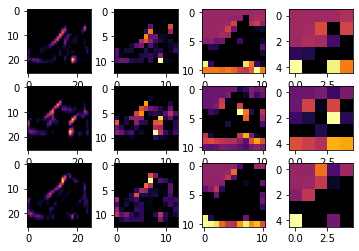

In [14]:
# Visualize convolutions
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 3

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

# Finished

In [15]:
# Print time when finished
now = datetime.now()
print("Finished! At", now.strftime("%Y-%m-%d %H:%M:%S"))

Finished! At 2021-04-24 13:49:44
